In [1]:
from spacytextblob.spacytextblob import SpacyTextBlob
import nltk

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
fichier = open('The-Lord-of-the-Rings.txt', 'r', encoding='utf-8')

# Lire les 24000 premières lignes du fichier
nombre_lignes_voulues = 24000
texte = ""
for i in range(nombre_lignes_voulues):
    ligne = fichier.readline()
    if not ligne:
        break
    texte += ligne

# Fermer le fichier après avoir lu les lignes nécessaires
fichier.close()

# Afficher le contenu du fichier
print(texte[:500])

THE LORD

OF THE RINGS


BY

J.R.R. TOLKIEN



ILLUSTRATED BY

Alan Lee





Three Rings for the Elven-kings under the sky,



Seven for the Dwarf-lords in their halls of stone,





Nine for Mortal Men doomed to die,



One for the Dark Lord on his dark throne





In the Land of Mordor where the Shadows lie.



One Ring to rule them all, One Ring to find them,





One Ring to bring them all and in the darkness bind them



In the Land of Mordor where the Shadows lie.





Contents





Title 


In [3]:

nlp = spacy.load('en_core_web_sm')
nlp.max_length = 3100000
# Traiter le texte avec spaCy
doc = nlp(texte)


# Identifier les entités nommées (personnages)
personnages = set()
for ent in doc.ents:
    if ent.label_ == "PERSON":  # "PER" est l'étiquette pour les entités de type "personne" dans le modèle français
        personnages.add(ent.text)

# Vérifier les personnages identifiés
print(personnages)

{'Quickly Éomer', 'Gollum', 'Cerin Amroth', 'Wold', 'Master Stormcrow', 'Quickly', 'Yellow Face', 'Felaró', 'Gondor', 'Staddle', 'Scatha', 'Náin', 'Gléowine', 'Elfwine the Fair', 'Paladin', 'Dead Men', 'dol', 'Hollin', 'Fundin', 'Ardamin', 'Dúnadan', 'grey line', 'Chief Shirriff', 'Gimli Glóin', 'Bid Éowyn', 'afar', 'Meriadoc', 'Gorgoroth', 'Galdor', 'Adelard', 'Dawn', 'Thengel', 'Maggot', 'Duilin', 'Arwen Undómiel', 'Lady', 'Arod', 'calmer', 'Thráin', 'Merry to Aragorn', 'Master Elrond', 'Houghton Mifflin', 'Sting', 'Doom', 'Baruk Khazâd', 'Slowly Théoden', 'Eärnur', 'Aldamir', 'Lindir', 'Rose Cotton', 'Dimrill Dale', 'Faramir Ithilien', 'Gilraen', 'Elfhelm', 'Young', 'Pinnath Gelin', 'Scaring Bree', 'Imladris', 'Undimmed', 'Folco Boffin', 'Yéni', 'the Brandywine Bridge', 'tom', 'Captain of the Tower', 'Unexpected Journey', 'noro lim', 'Briefly Strider', 'Green', 'Presently Ghân', 'Aman', 'FRODO BAGGINS', 'Cirith Gorgor', 'Barad-dûr', 'Dike', 'Little Elanor', 'Hardy', 'Rohan', 'Warily

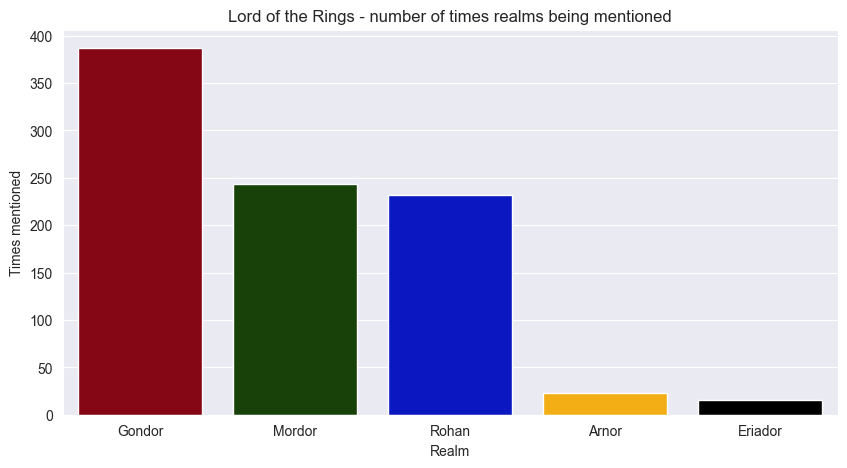

In [11]:


Eriador = texte.count("Eriador")
Arnor = texte.count("Arnor")
Rohan = texte.count("Rohan")
Gondor = texte.count("Gondor")
Mordor = texte.count("Mordor")
Rhun = texte.count("Rhun")
realms_list = [['Gondor', Gondor], ['Mordor', Mordor], ['Rohan', Rohan], ['Arnor', Arnor], ['Eriador', Eriador]]
df_realms=pd.DataFrame(realms_list, columns=['Realm', 'Times mentioned'])
colors = ["crimson", "forrest green", "true blue", "amber", "black"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="Realm", y="Times mentioned", saturation=0.9, data=df_realms).set_title("Lord of the Rings - number of times realms being mentioned")



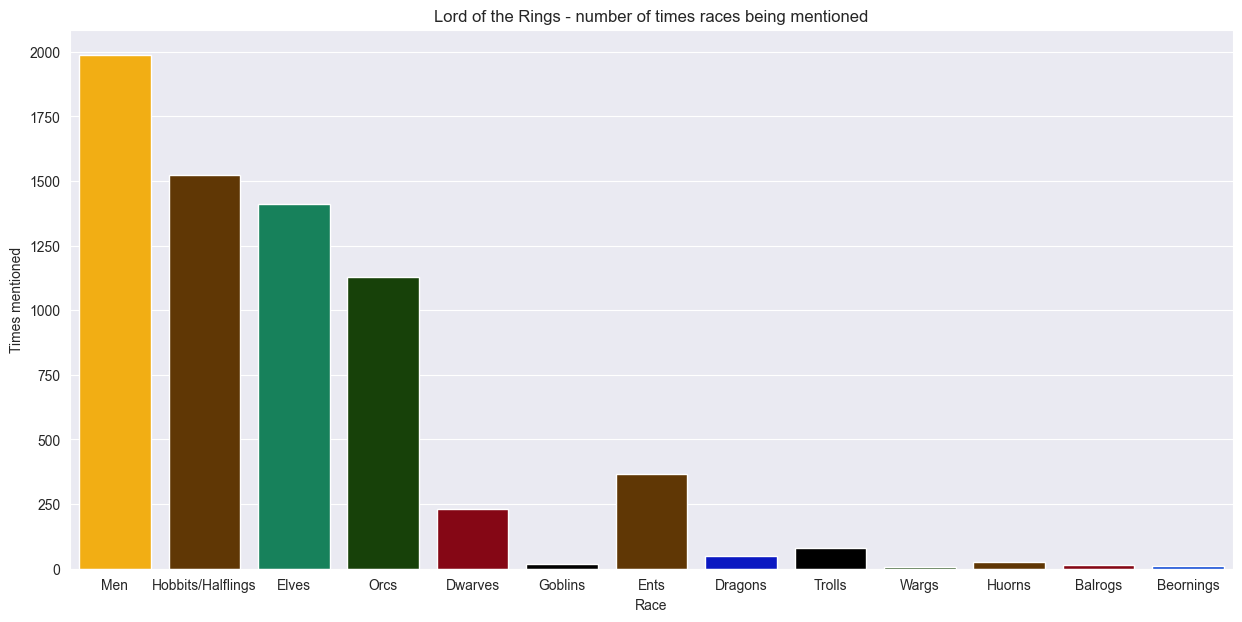

In [14]:


Orc = texte.count("Orc")+texte.count("Orcs")+texte.count("orc")+texte.count("orcs")+texte.count("orcish")
Human = texte.count("Man")+texte.count("Mankind")+texte.count("Men")+texte.count("men")+texte.count("human")
Elf = texte.count("Elf")+texte.count("Elves")+texte.count("elf")+texte.count("elves")+texte.count("elven")
Dwarf = texte.count("Dwarf")+texte.count("Dwarves")+texte.count("dwarf")+texte.count("dwarves")+texte.count("dwarven")
Halfling = texte.count("Halfling")+texte.count("Hobbit")+texte.count("Hobbits")+texte.count("Halflings")+texte.count("halfling")+texte.count("hobbit")+texte.count("hobbits")+texte.count("halflings")
Ent = texte.count("Ents")+texte.count("Ent")
Troll = texte.count("Troll")+texte.count("troll")+texte.count("Trolls")+texte.count("trolls")
Dragon = texte.count("dragon")+texte.count("dragons")+texte.count("Dragon")+texte.count("Dragons")
Balrog = texte.count("Balrog")+texte.count("Balrogs")+texte.count("balrog")+texte.count("balrogs")
Goblin = texte.count("Goblin")+texte.count("Goblins")+texte.count("goblin")+texte.count("goblins")
Warg = texte.count("Warg")+texte.count("Wargs")+texte.count("warg")+texte.count("wargs")
Huorn =texte.count("Huorn")+texte.count("Huorns")+texte.count("huorn")+texte.count("huorns")
Beorning = texte.count("Beorning")+texte.count("Beornings")+texte.count("beorning")+texte.count("beornings")+texte.count("Skin-changers")+texte.count("Skin-changer")+texte.count("skin-changer")+texte.count("skin-changers")
races_list = [['Men', Human], ['Hobbits/Halflings', Halfling], ['Elves', Elf], ['Orcs', Orc], ['Dwarves', Dwarf],  ['Goblins', Goblin], ['Ents', Ent], ["Dragons", Dragon], ['Trolls', Troll], ["Wargs", Warg], ['Huorns', Huorn], ["Balrogs", Balrog], ["Beornings", Beorning]]
df_races=pd.DataFrame(races_list, columns=['Race', 'Times mentioned'])
colors = ["amber", "brown", "dark sea green", "forrest green", "crimson", "black",  "brown", "true blue", "black", "forrest green", "brown", "crimson", "blue"]
sns.set_style("darkgrid")
plt.figure(figsize=(15, 7))
with sns.xkcd_palette(colors):
    sns.barplot(x="Race", y="Times mentioned", saturation=0.9, data=df_races).set_title("Lord of the Rings - number of times races being mentioned")



In [51]:
sentiment=[]
x=0
text1= TextBlob(texte)

for sentence in text1:
    text1.sentiment

for sentence in text1.sentences:
    sentiment.append(sentence.sentiment)
    
sentence_df = pd.DataFrame(sentiment)
sentence_df.describe()

,polarity,subjectivity
count,29565.000000,29565.000000
mean,0.043322,0.319317
std,0.250912,0.303735
min,-1.000000,0.000000
25%,-0.009167,0.000000
50%,0.000000,0.325000
75%,0.100000,0.519444
max,1.000000,1.000000


In [13]:

def analyze_sentiment(text):
    # Utilisation de SpaCy pour obtenir les lemmes des mots
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    # Utilisation de TextBlob pour l'analyse de sentiments
    blob = TextBlob(lemmatized_text)
    sentiment_score = blob.sentiment.polarity
    
    return sentiment_score
 
    
sentences = nltk.sent_tokenize(texte)

sentiment_scores = []

# Analyser le sentiment pour chaque phrase contenant "Frodo"
for sentence in sentences:
    if "Frodo" in sentence:
        sentiment_score = analyze_sentiment(sentence)
        sentiment_scores.append(sentiment_score)
    
# Calculer la moyenne des scores de sentiment pour Frodo
if sentiment_scores:
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
else:
    average_sentiment = 0.0

print(f"Moyenne des sentiments pour Frodo : {average_sentiment}")


Moyenne des sentiments pour Frodo : 0.04308044761990186


In [ ]:
#Faire une liste de phrase à tester sur le blob

In [15]:

# Liste des personnages
personnages = ["Frodo", "Gandalf", "Sam", "Aragorn", "Gimli", "Legolas", "Saruman", "Orcs", "Sauron"]

# Initialiser un dictionnaire pour stocker les scores de sentiment associés à chaque personnage
sentiment_scores = {personnage: [] for personnage in personnages}

# Analyser le sentiment pour chaque phrase et associer le score au personnage correspondant
for sentence in sentences:
    for personnage in personnages:
        if personnage in sentence:
            sentiment_score = analyze_sentiment(sentence)
            sentiment_scores[personnage].append(sentiment_score)

mean_sentiments = {personnage: sum(scores) / len(scores) if scores else 0.0 for personnage, scores in sentiment_scores.items()}

# Créer un DataFrame pandas à partir du dictionnaire des moyennes de sentiment
df = pd.DataFrame.from_dict(mean_sentiments, orient="index", columns=["Moyenne des sentiments"])


# Trier le DataFrame par ordre décroissant de la moyenne de sentiment
df = df.sort_values(by="Moyenne des sentiments", ascending=False)

# Afficher le tableau avec les moyennes des sentiments pour chaque personnage
print(df)

         Moyenne des sentiments
Saruman                0.060288
Gandalf                0.052475
Legolas                0.049871
Orcs                   0.046875
Frodo                  0.043080
Aragorn                0.036839
Gimli                  0.036782
Sauron                 0.032535
Sam                    0.021184


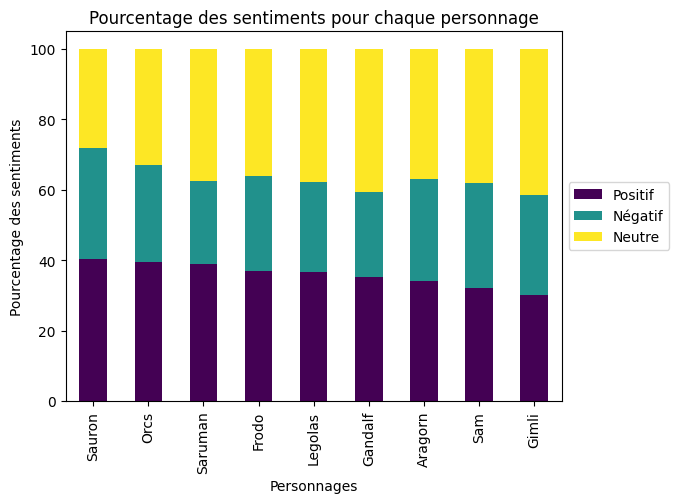

In [16]:
# Calculer les pourcentages des scores de sentiment pour chaque personnage
percentages = {}
for personnage, scores in sentiment_scores.items():
    total_scores = len(scores)
    positive_scores = len([score for score in scores if score > 0])
    negative_scores = len([score for score in scores if score < 0])
    neutral_scores = total_scores - positive_scores - negative_scores
    
    positive_percentage = (positive_scores / total_scores) * 100
    negative_percentage = (negative_scores / total_scores) * 100
    neutral_percentage = (neutral_scores / total_scores) * 100
    
    percentages[personnage] = {
        "Positif": positive_percentage,
        "Négatif": negative_percentage,
        "Neutre": neutral_percentage
    }
# Créer un DataFrame pandas à partir du dictionnaire des pourcentages
df = pd.DataFrame.from_dict(percentages, orient="index")

# Trier le DataFrame par ordre décroissant de la moyenne de sentiment positif
df = df.sort_values(by="Positif", ascending=False)

# Transposer le DataFrame pour inverser abscisse et ordonnée
df_transposed = df.T


# Créer le graphique en barres
df.plot(kind="bar", stacked=True, colormap="viridis")
plt.xlabel("Personnages")
plt.ylabel("Pourcentage des sentiments")
plt.title("Pourcentage des sentiments pour chaque personnage avec Spacy")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()